In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Titanic Dataset Exploratory Data Analysis (EDA)

## Step 1: Load the Dataset
We start by loading the dataset and exploring the basic structure.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Show the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Generate Summary Statistics
We generate basic descriptive statistics to understand central tendency and spread.


In [3]:
# Descriptive statistics for numeric columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 3: Check for Missing Values
Understanding missing data is critical for analysis and preprocessing.


In [4]:
# Missing values percentage
(df.isnull().mean() * 100).sort_values(ascending=False)


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

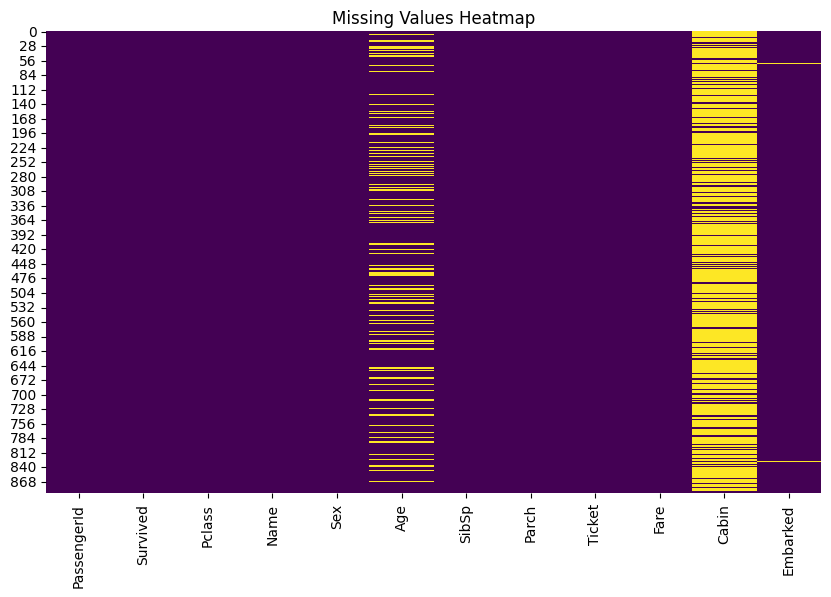

In [5]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## Step 4: Univariate Analysis - Numeric Features
We explore the distribution of individual numeric features using histograms and boxplots.


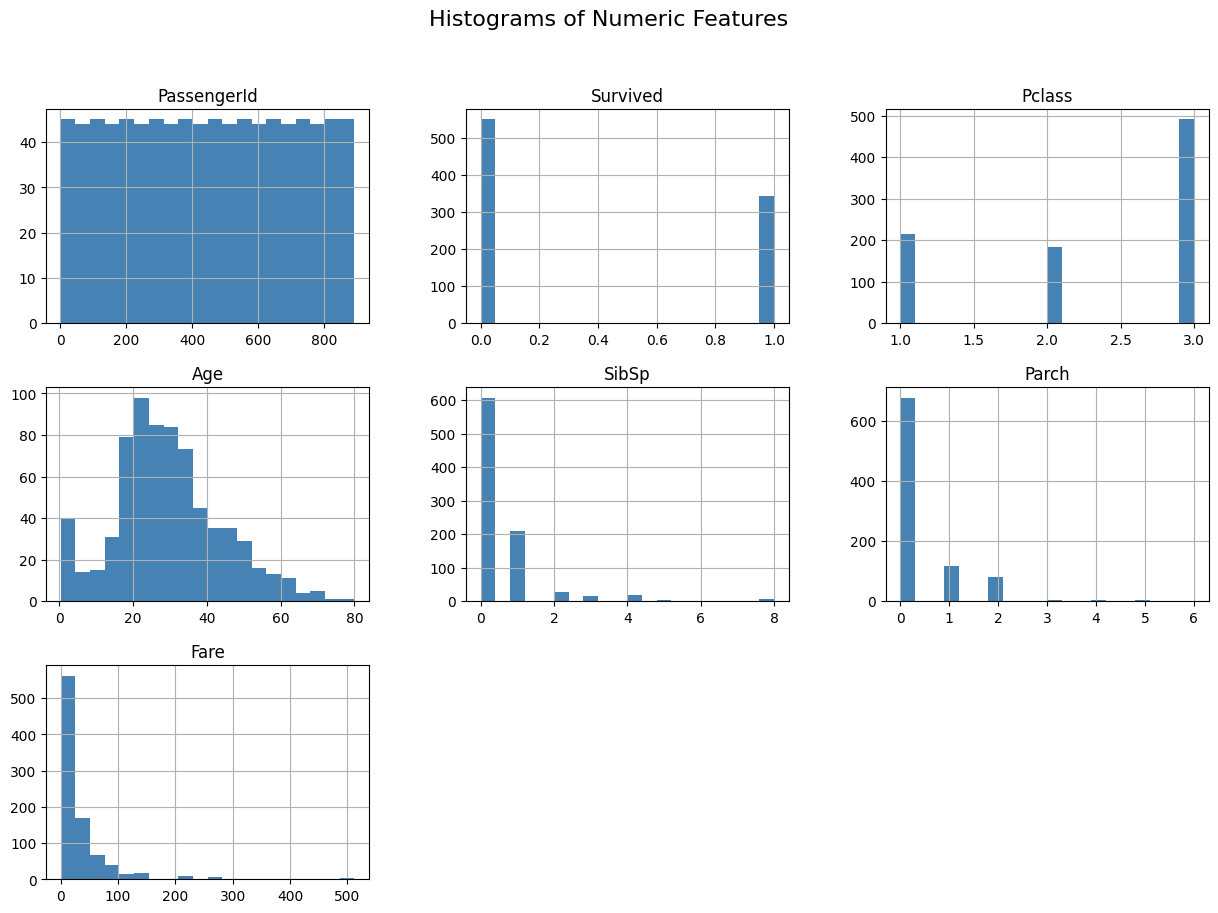

In [6]:
# List of numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Histograms
df[num_cols].hist(figsize=(15,10), bins=20, color='steelblue')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()


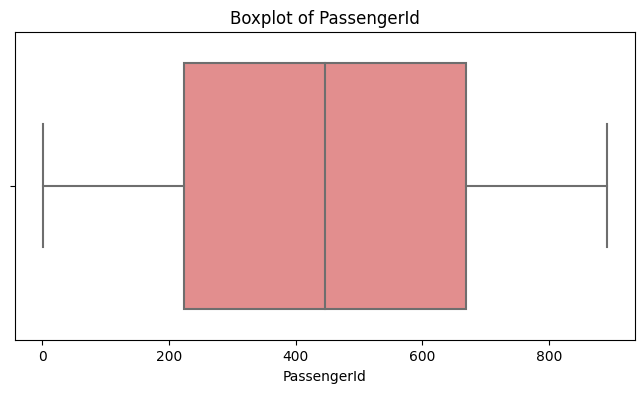

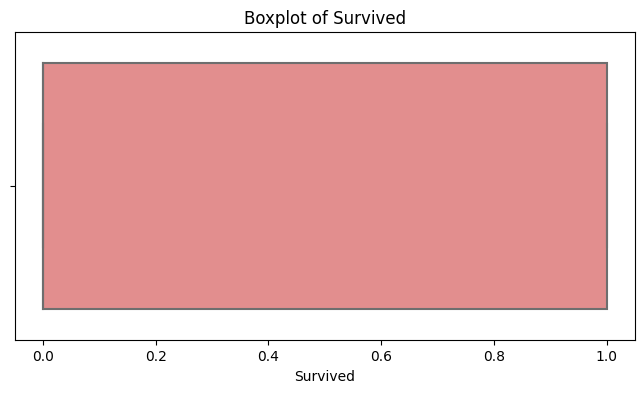

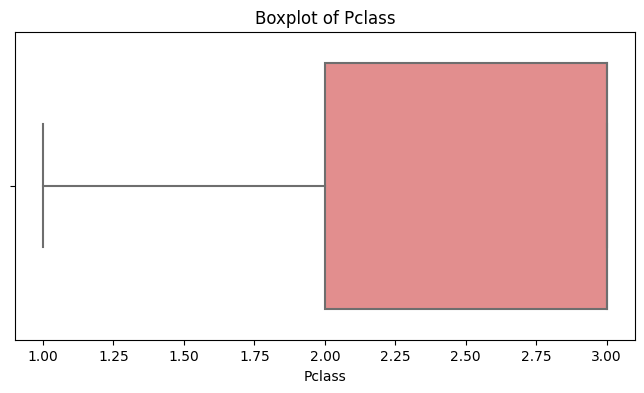

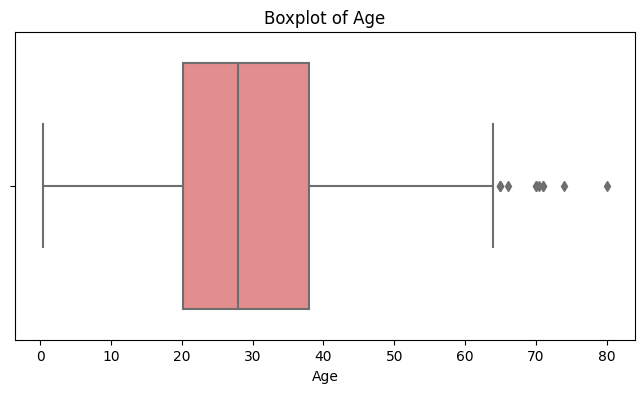

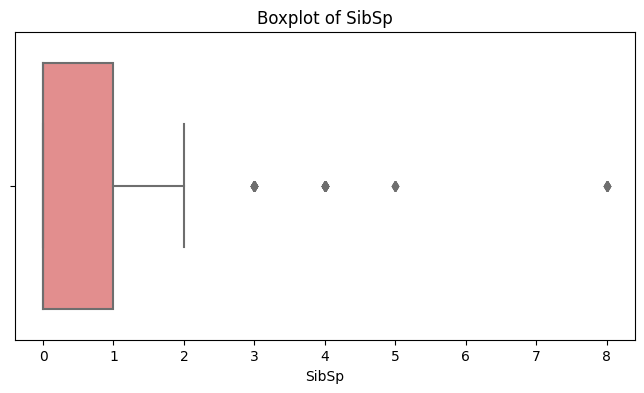

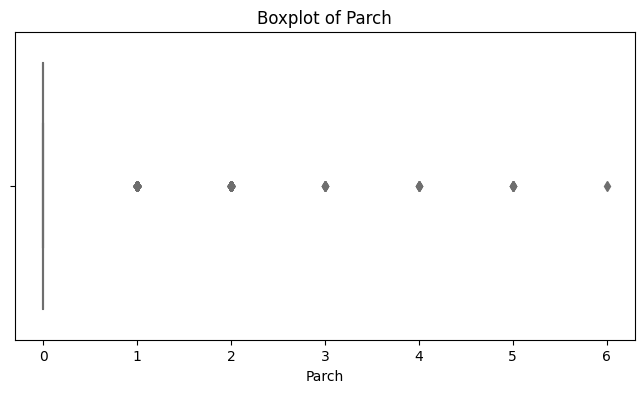

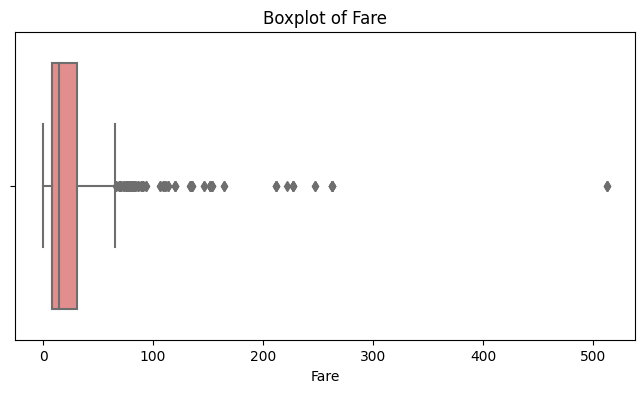

In [7]:
# Boxplots
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()


## Step 5: Bivariate Analysis - Correlations
We examine relationships between numeric features using a correlation matrix and pairplot.


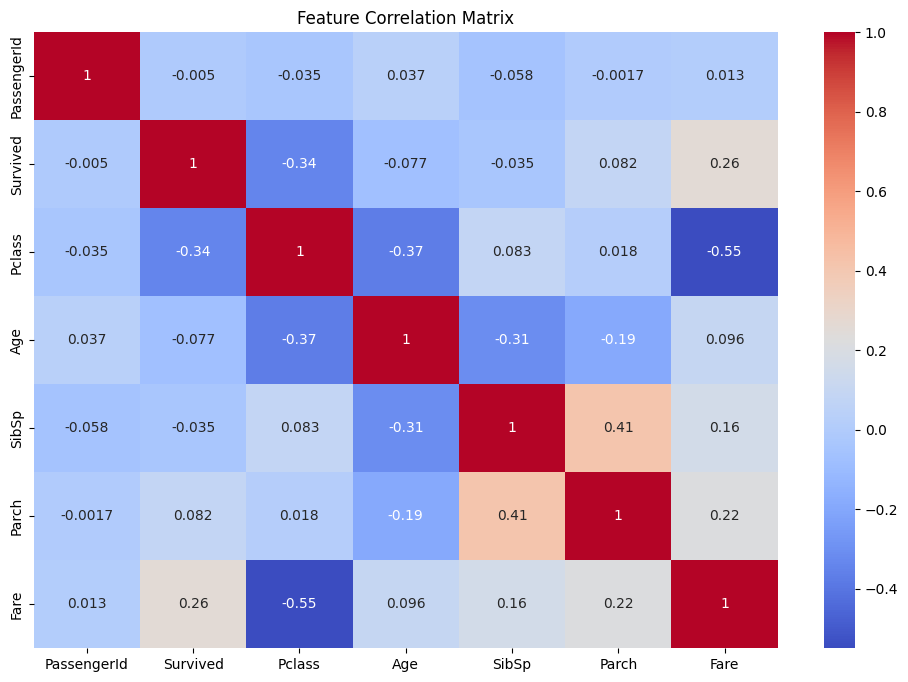

In [8]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


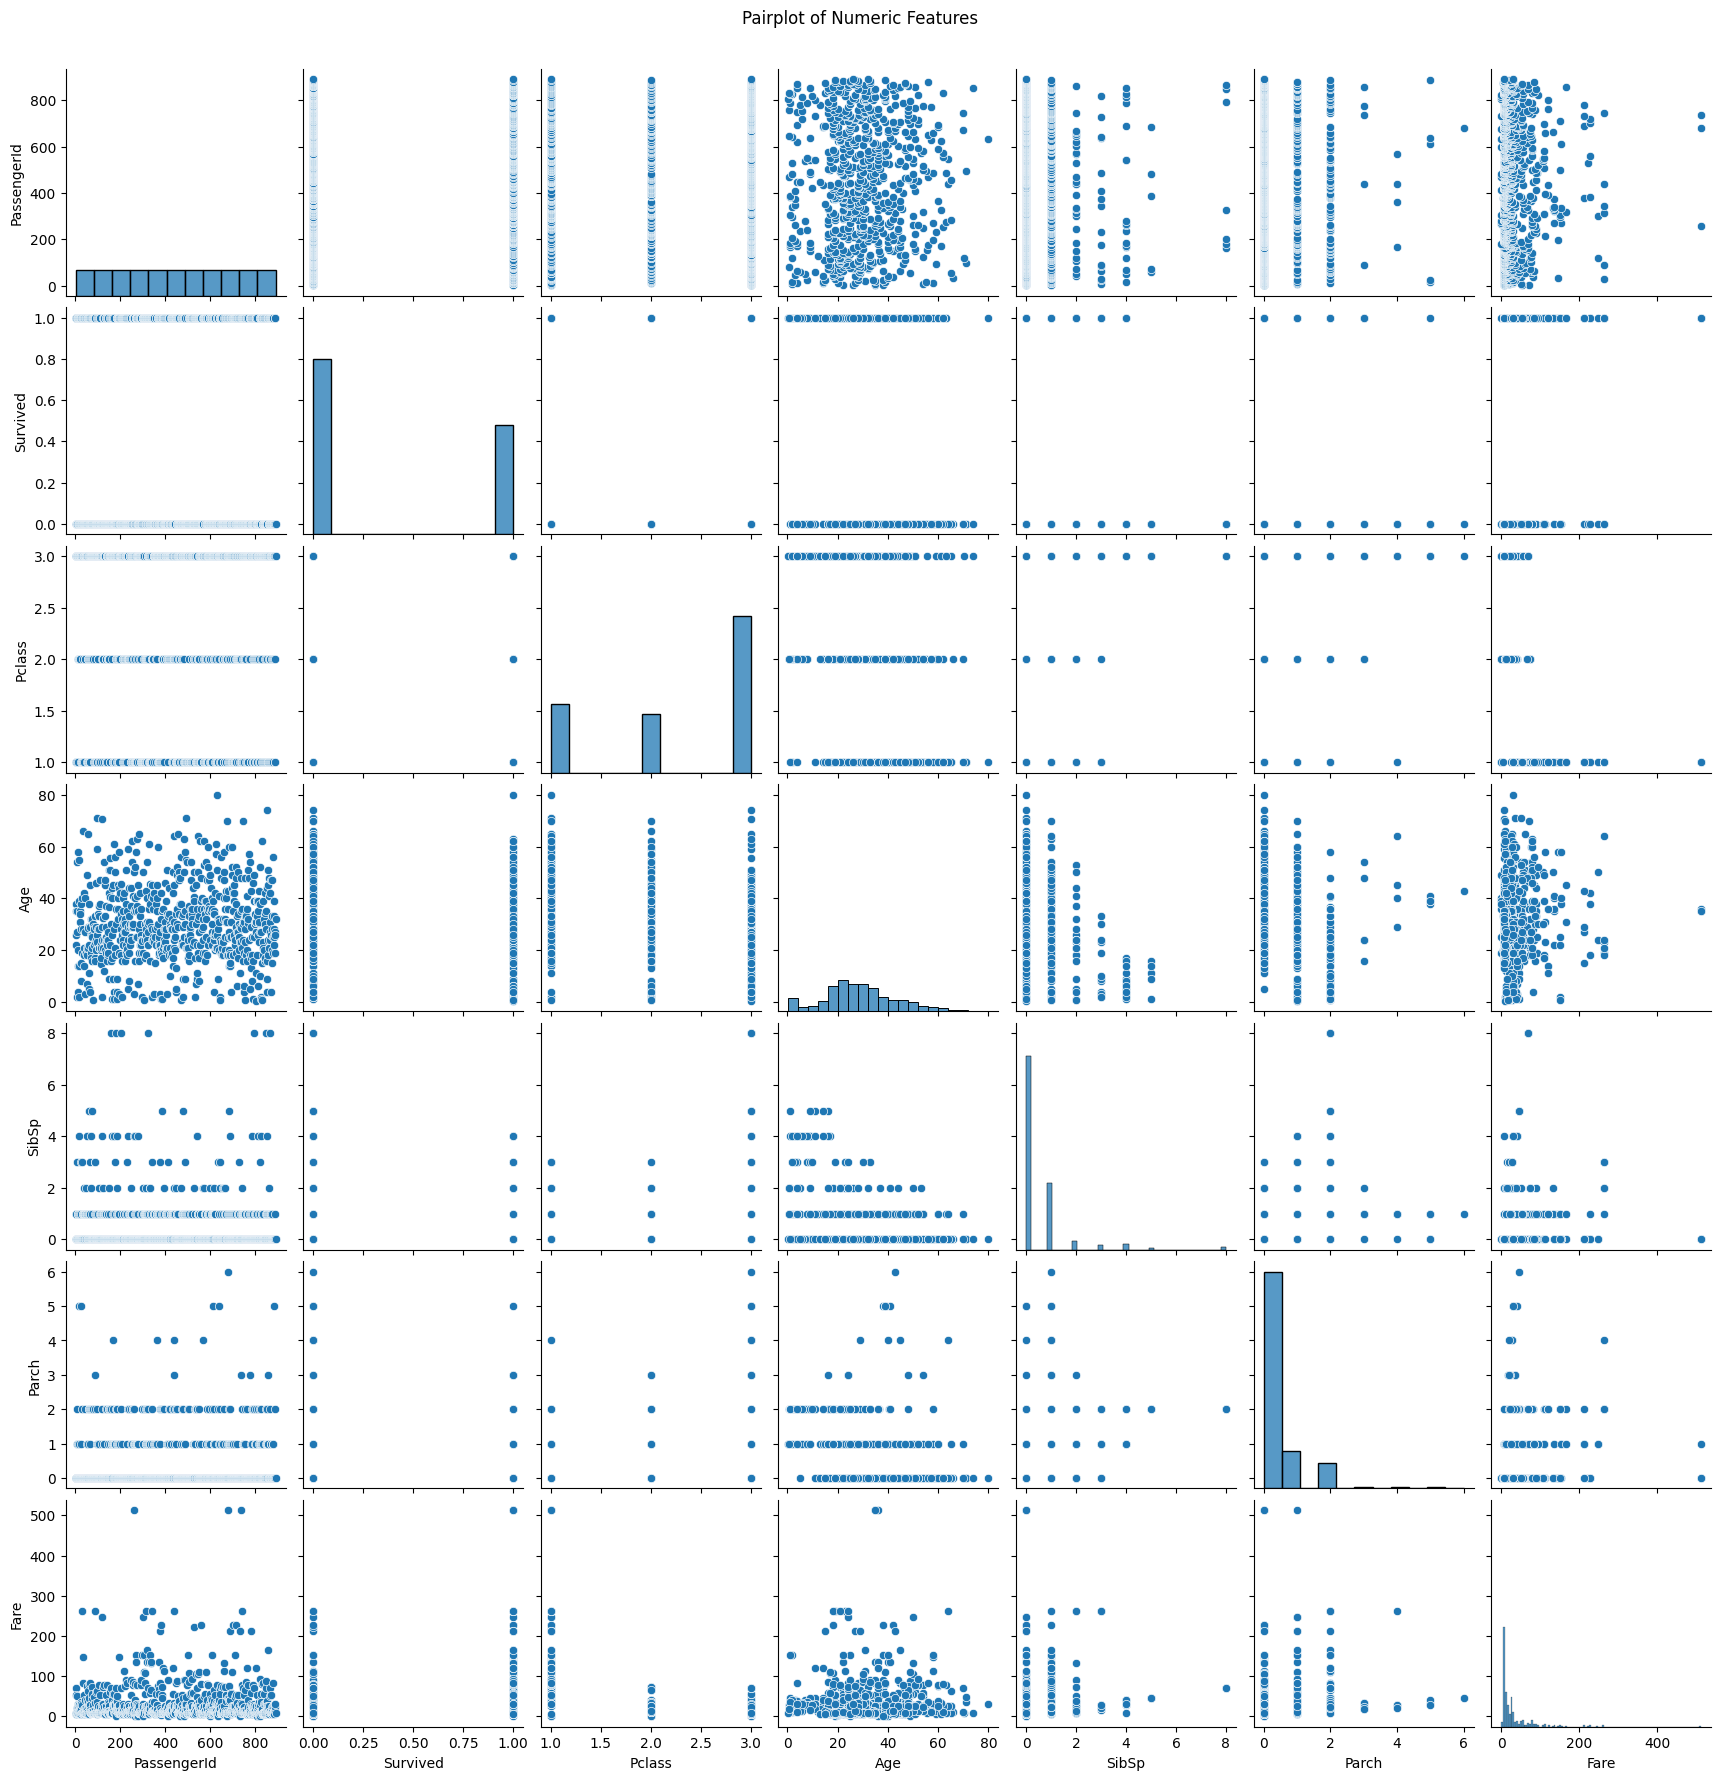

In [9]:
# Pairplot
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


## Step 6: Categorical Feature Exploration
We explore categorical variables like 'Sex', 'Embarked', 'Pclass' with count plots and bar plots.


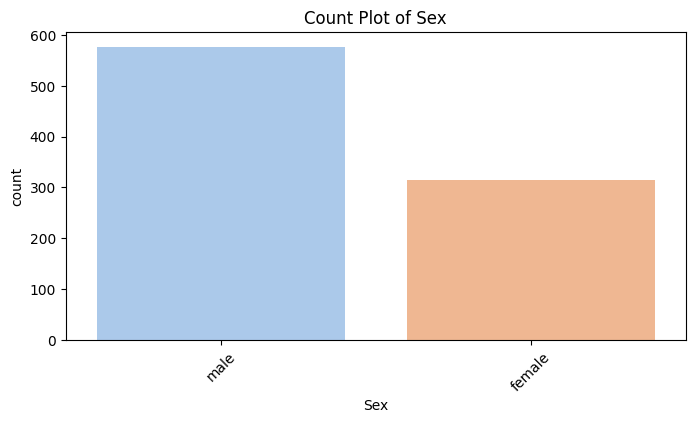

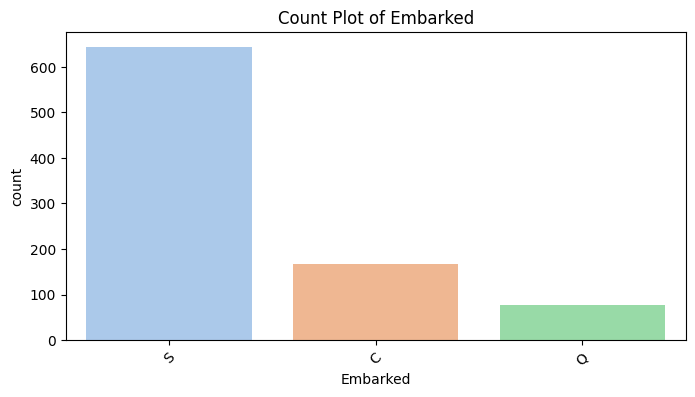

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
skip_cols = ['Ticket', 'Cabin' , 'Name']
plot_cols = [col for col in cat_cols if col not in skip_cols]

for col in plot_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


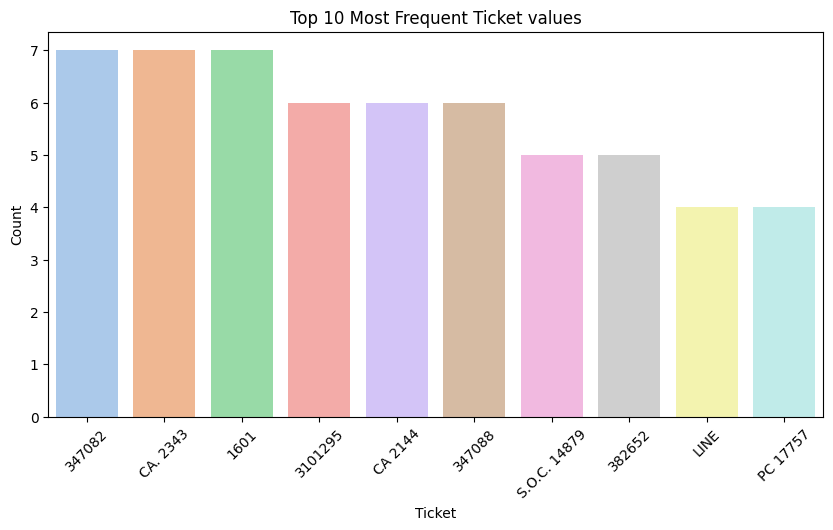

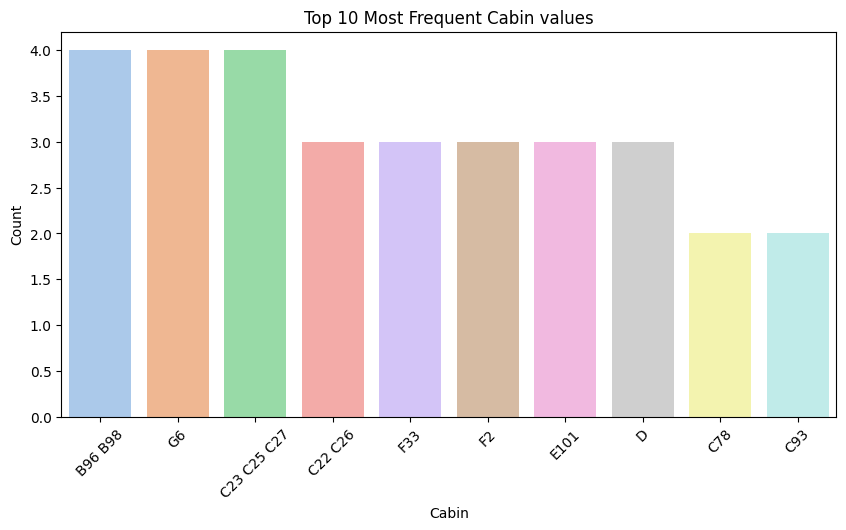

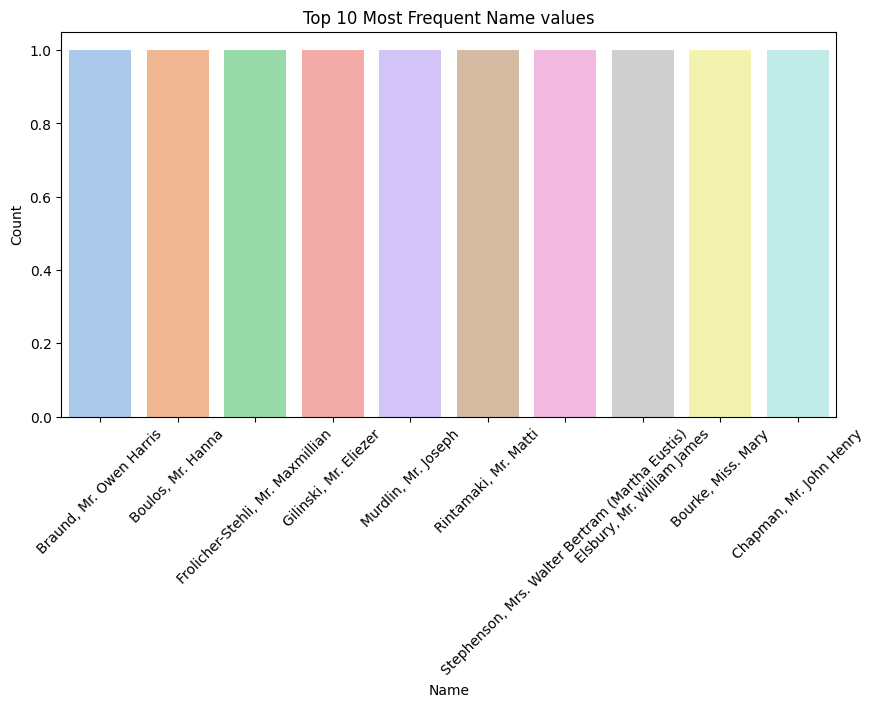

In [11]:
for col in ['Ticket', 'Cabin' , "Name"]:
    plt.figure(figsize=(10,5))
    top_values = df[col].value_counts().nlargest(10)  # top 10
    sns.barplot(x=top_values.index, y=top_values.values, palette='pastel')
    plt.title(f'Top 10 Most Frequent {col} values')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()


## Step 7: Advanced Visualizations with Plotly
Interactive visualizations provide deeper insights.


In [12]:
# Age distribution by Survived status
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title='Age Distribution by Survival Status')
fig.show()


In [13]:
# Survival rate by Passenger Class
fig = px.bar(df, x='Pclass', color='Survived', barmode='group', title='Survival Rate by Passenger Class')
fig.show()


## Step 8: Key Observations
From our EDA:

- Males had lower survival rates than females.
- Passengers in 1st class had higher survival rates.
- Missing values exist mainly in 'Cabin' and 'Age'.
- Age has some outliers and is slightly right-skewed.
- Fare also shows strong right skewness and outliers.

We can use these insights to guide preprocessing and feature engineering.
